# 1. 2-D Transforms

[[0 0 1 1]
 [0 1 1 0]
 [1 1 1 1]]
[[1.7320508075688772, 1, 6], [-1, 1.7320508075688772, 4], [0, 0, 4]]
[[6.         7.         8.73205081 7.73205081 6.        ]
 [4.         5.73205081 4.73205081 3.         4.        ]
 [4.         4.         4.         4.         4.        ]]


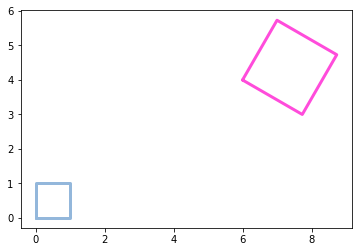

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string
import math

# points a, b and, c
a, b, c,d  = (0, 0, 1), (0, 1, 1),(1, 1, 1),(1,0,1)


# matrix with row vectors of points
P = np.array([a, b, c,d]).T
print(P)

k=math.sqrt(3)

# H = np.identity(3)
# H[0,0] = 2
# H[1,1] = 2
# H[2, 0] = 0.3
# H[2, 1] = 0.5

t = np.pi/3
#Rotational
H=[[k,1,6],[-1,k,4],[0,0,4]]
#H = [[np.cos(t), np.sin(t), 0.], [-np.sin(t), np.cos(t), 0.], [0., 0., 1.]]

#Scaling
#H2=[[2,0,0],[0,2,0],[0,0,1]]

#Transalation
#H1=[[1,0,6],[0,1,2],[0,0,100]]

#Shear
#H=[[0,-2,6],[2,0,2],[0,0,1]]

print(H)

Pt = np.matmul(H, P)


P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1)
x = P[0, :]
y = P[1, :]


Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0, :]
yt = Pt[1, :]
print(Pt)

fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


ax.plot(xt, yt, color='#ff00cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')


# 2. Warping Using a Given Homography

In [6]:
import cv2 as cv
import numpy as np

im1 = cv.imread('C:\\Users\\user\\Desktop\\Assignment\\Assignment\\images\\graf\\img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('C:\\Users\\user\\Desktop\\Assignment\\Assignment\\images\\graf\\img5.ppm', cv.IMREAD_ANYCOLOR)

cv.imshow("Image 1", im1)

   
with open('C:\\Users\\user\\Desktop\\Assignment\\Assignment\\images\\graf\\H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]       
print(H)
H = np.array(H)

print(H)


im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)
cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]
[[ 6.2544644e-01  5.7759174e-02  2.2201217e+02]
 [ 2.2240536e-01  1.1652147e+00 -2.5605611e+01]
 [ 4.9212545e-04 -3.6542424e-05  1.0000000e+00]]


# 3. Computing the Homogrpahy Using Mouse-Clicked Points and Warping

In [2]:
import cv2 as cv
import numpy as np


N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          
im1 = cv.imread('C:\\Users\\user\\Desktop\\Assignment\\Assignment\\images\\graf\\img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('C:\\Users\\user\\Desktop\\Assignment\\Assignment\\images\\graf\\img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()
   
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

H, status =cv.findHomography(p2,p1,cv.RANSAC)
im4_warped=cv.warpPerspective(im4,H,(1000,1000))
im4_warped[0:im1.shape[0],0:im4.shape[1]]=im1
cv.namedWindow("Image 4 warped",cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 warped",im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

# 4. Computing the Homogrpahy Using Mouse-Clicked Points without OpenCV

In [3]:
import cv2 as cv
import numpy as np


N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('C:\\Users\\user\\Desktop\\Assignment\\Assignment\\images\\graf\\img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('C:\\Users\\user\\Desktop\\Assignment\\Assignment\\images\\graf\\img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()
   

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


print(p1)
print(p2)

A = []

for i in range(0,len(p1)):
    x,y=p1[i][0],p1[i][1]
    u,v=p2[i][0],p2[i][1]
    A.append([x,y,1,0,0,0,-u*x,-u*y,-u])
    A.append([0,0,0,x,y,1,-v*x,-v*y,-v])
A=np.asarray(A)
U,S,Vh=np.linalg.svd(A)
L=Vh[-1,:]/Vh[-1,-1]
H=L.reshape(3,3)

im_out=cv.warpPerspective(im4,np.linalg.pinv(H),(1000,1000))

im_out[0:im1.shape[0],0:im4.shape[1]]=im1
cv.namedWindow("Image Output",cv.WINDOW_AUTOSIZE)
cv.imshow("Image Output",im_out)
cv.waitKey(0)
cv.destroyAllWindows()            



[[332. 191.]
 [405. 210.]
 [541. 225.]
 [638. 297.]
 [390. 457.]]
[[282. 249.]
 [324. 249.]
 [385. 239.]
 [470. 275.]
 [467. 465.]]


# Stich more than one photo.

In [4]:
import cv2 as cv
import numpy as np


N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))
p3 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('C:\\Users\\user\\Desktop\\Assignment\\Assignment\\images\\graf\\img1.ppm', cv.IMREAD_ANYCOLOR)
im3 = cv.imread('C:\\Users\\user\\Desktop\\Assignment\\Assignment\\images\\graf\\img3.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('C:\\Users\\user\\Desktop\\Assignment\\Assignment\\images\\graf\\img4.ppm', cv.IMREAD_ANYCOLOR)

print(im1.shape)
print(im3.shape)
print(im4.shape)



im1copy = im1.copy()
im3copy = im3.copy()
im4copy = im4.copy()   

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


param = [p2, im3copy]
n = 0
cv.namedWindow("Image 3", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 3',draw_circle, param)

while(1):
    cv.imshow("Image 3", im3copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
        
H, status=cv.findHomography(p2,p1,cv.RANSAC)
im_warped=cv.warpPerspective(im3,H,(1000,1000))
im_warped[0:im1.shape[0],0:im1.shape[1]]=im1

print(im_warped.shape)

cv.namedWindow("Image warped 1",cv.WINDOW_AUTOSIZE)
cv.imshow("Image warped 1",im_warped)        

param = [p3, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

        

        
        
        

H_two, status_two=cv.findHomography(p3,p1,cv.RANSAC)
im_warped_two=cv.warpPerspective(im4,H_two,(2000,2000))
im_warped_two[0:im_warped.shape[0],0:im_warped.shape[1]]=im_warped



cv.namedWindow("Image warped two",cv.WINDOW_AUTOSIZE)
cv.imshow("Image warped two",im_warped_two)
cv.waitKey(0)
print(p3)
cv.destroyAllWindows()


(640, 800, 3)
(640, 800, 3)
(640, 800, 3)
(1000, 1000, 3)
[[282. 252.]
 [323. 252.]
 [384. 236.]
 [471. 272.]
 [449. 335.]]


# Image Stiching using SIFT

In [5]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

img_ = cv2.imread('C:\\Users\\user\\Desktop\\Assignment\\Assignment\\images\\graf\\img5.ppm')
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)

img = cv2.imread('C:\\Users\\user\\Desktop\\Assignment\\Assignment\\images\\graf\\img3.ppm')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2.namedWindow("image 5", cv2.WINDOW_AUTOSIZE)
cv2.imshow("image 5", img_)
cv2.waitKey(0)
cv2.namedWindow("image 3", cv2.WINDOW_AUTOSIZE)
cv2.imshow("image 3", img)
cv2.waitKey(0)
#cv2.destroyAllWindows()
sift=cv2.SIFT()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        good.append(m)
matches = np.asarray(good)
print (matches)
if len(matches[:,0]) >= 3:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
    #print H
else:
    raise AssertionError("Cant find enough keypoints")
dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))
plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
plt.show()
plt.figure()
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite('output.jpg',dst)
plt.imshow(dst)
plt.show()
cv2.namedWindow('output.jpg', cv2.WINDOW_AUTOSIZE)
cv2.imshow('output.jpg', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: Unknown C++ exception from OpenCV code